# Health Index Analysis of XLPE Cable Insulation using Machine Learning Technique🌠

This notebook is for Health Index Analysis of Xlpe Cable using machine learning models and techniques.

We are going to take following approach:
* Problem Definition

Application of Machine Learning towards the prediction of the insulation health condition of high voltage XLPE cable.
* Data

  * The primary objective is to collect the 15KV XLPE cable insulation dataset with the help of field supervisor.The data set is   obtained from Utility Analytics Network.

  * The test data provided information about each sample's Partial Discharge,Magnitude,Aging,Neutral corrosion,Loading,Visual       condition etc.
  * Data can be found on Kaggle link: https://www.kaggle.com/utilityanalytics/utility-underground-cable-dataset1
  * Condition/Health Index Attributes:
  
    1.Partial Discharge (Min-Max Normalized)
    
    2.Visual Condition
    
    3.Natural Corrosion (Min-Max Normalized)
    
    4.Loading Condition (Recorded Peak Loading in Amps, not affecting Health Index)
* Evaluation

Multiclass classification of five different health index classes based on the acquired dataset.
* Features

   The health index code is as follow:
  * Index1- Very poor,Red,Need an immediate replacement
  * Index-2- Poor, Brown, Replacement within the predefined period
  * Index-3 - Moderate,Light green, Maintenance required concerning the time
  * Index-4 - Good,Yellow-green,Normal Maintenance
  * Index-5 - Very good,Green,Wait up to the scheduled maintenance period
  
  
* Modelling
* Experimentation


## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings

In [2]:
# We simply see the data we have with us.
data=pd.read_csv("Data/2018-15KV-XLPE Cable.csv")
data.head()

,ID,Age,Partial Discharge,Visual Condition,Natural Corrosion,Loading,Health Index
0,1,18,0.08,Medium,0.53,646,4
1,2,28,0.21,Medium,0.71,131,4
2,3,27,0.19,Medium,0.69,552,4
3,4,18,0.07,Medium,0.53,155,4
4,5,16,0.06,Good,0.50,349,5


In [3]:
data=data.rename(columns={"Natural Corrosion":"Neutral Corrosion"})

In [4]:
np.random.seed(42)
data=data.sample(frac=1)
data

,ID,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading,Health Index
1447,1448,33,0.31,Poor,0.74,77,3
1114,1115,19,0.08,Medium,0.52,89,4
1064,1065,16,0.05,Good,0.46,569,5
2287,2288,42,0.55,Poor,0.90,122,2
1537,1538,17,0.07,Good,0.47,508,5
...,...,...,...,...,...,...,...
1638,1639,51,0.95,Poor,0.93,378,1
1095,1096,38,0.47,Poor,0.80,276,3
1130,1131,51,0.93,Poor,0.94,180,1
1294,1295,40,0.50,Poor,0.86,347,3


In [5]:
df=data.drop("ID",axis=1)
df.head()

,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading,Health Index
1447,33,0.31,Poor,0.74,77,3
1114,19,0.08,Medium,0.52,89,4
1064,16,0.05,Good,0.46,569,5
2287,42,0.55,Poor,0.90,122,2
1537,17,0.07,Good,0.47,508,5


In [6]:
df.shape

(2500, 6)

In [7]:
df["Visual Condition"].value_counts()

Poor      1475
Medium     550
Good       475
Name: Visual Condition, dtype: int64

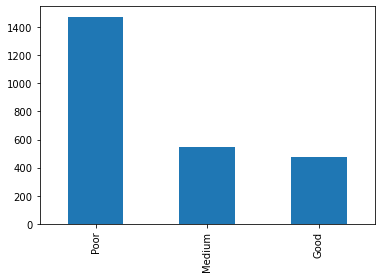

In [8]:
df["Visual Condition"].value_counts().plot(kind="bar");

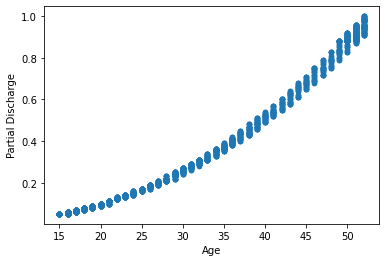

In [9]:
df.plot(x="Age",y="Partial Discharge",kind="scatter");

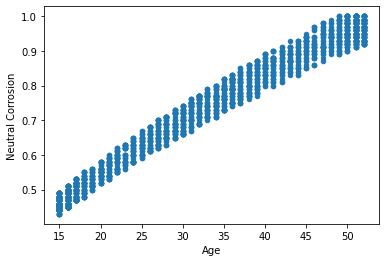

In [10]:
df.plot(x="Age",y="Neutral Corrosion",kind="scatter",legend=True);

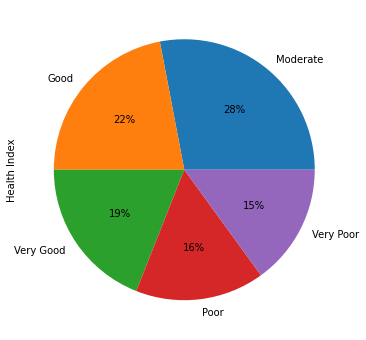

In [11]:
df["Health Index"].value_counts().plot(kind="pie",figsize=(10,6),autopct='%1.0f%%',labels=["Moderate","Good","Very Good","Poor","Very Poor"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1447 to 860
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2500 non-null   int64  
 1   Partial Discharge  2500 non-null   float64
 2   Visual Condition   2500 non-null   object 
 3   Neutral Corrosion  2500 non-null   float64
 4   Loading            2500 non-null   int64  
 5   Health Index       2500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 136.7+ KB


In [13]:
df.isna().sum()

Age                  0
Partial Discharge    0
Visual Condition     0
Neutral Corrosion    0
Loading              0
Health Index         0
dtype: int64

In [14]:
df.describe()

,Age,Partial Discharge,Neutral Corrosion,Loading,Health Index
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,32.209200,0.383312,0.719576,361.661200,3.140000
std,12.553393,0.309318,0.177716,169.854421,1.311903
min,15.000000,0.050000,0.430000,60.000000,1.000000
25%,20.000000,0.100000,0.550000,214.750000,2.000000
50%,32.000000,0.290000,0.730000,366.000000,3.000000
75%,43.000000,0.620000,0.880000,511.000000,4.000000
max,52.000000,1.000000,1.000000,650.000000,5.000000


C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


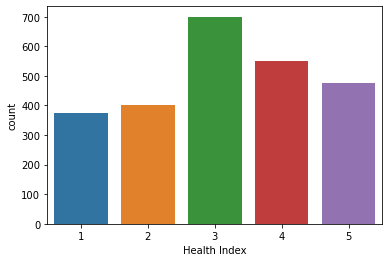

In [15]:
sns.countplot(df['Health Index'],x="Health Index");


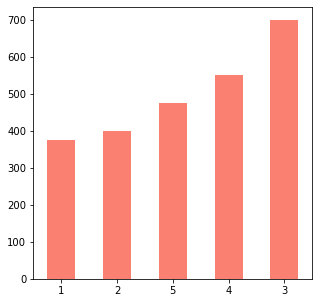

In [16]:
# Bar graph showing different number of datasets with different health index labels
df["Health Index"].value_counts().plot(kind="bar",figsize=(5,5),color="salmon").invert_xaxis();
plt.xticks(rotation=0);

In [17]:
from sklearn.model_selection import train_test_split
X=df.drop("Health Index",axis=1)
y=df["Health Index"]


In [18]:
len(X)

2500

In [19]:
len(y)

2500

In [20]:
X.head()

,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading
1447,33,0.31,Poor,0.74,77
1114,19,0.08,Medium,0.52,89
1064,16,0.05,Good,0.46,569
2287,42,0.55,Poor,0.90,122
1537,17,0.07,Good,0.47,508


In [21]:
y.head()

1447    3
1114    4
1064    5
2287    2
1537    5
Name: Health Index, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Visual Condition"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 3.10e-01, 7.40e-01, 7.70e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 8.00e-02, 5.20e-01, 8.90e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 5.00e-02, 4.60e-01, 5.69e+02],
       ...,
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 9.30e-01, 9.40e-01, 1.80e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 5.00e-01, 8.60e-01, 3.47e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 5.80e-01, 8.10e-01, 2.33e+02]])

In [23]:
len(transformed_X)

2500

In [24]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,33.0,0.31,0.74,77.0
1,0.0,1.0,0.0,19.0,0.08,0.52,89.0
2,1.0,0.0,0.0,16.0,0.05,0.46,569.0
3,0.0,0.0,1.0,42.0,0.55,0.90,122.0
4,1.0,0.0,0.0,17.0,0.07,0.47,508.0
...,...,...,...,...,...,...,...
2495,0.0,0.0,1.0,51.0,0.95,0.93,378.0
2496,0.0,0.0,1.0,38.0,0.47,0.80,276.0
2497,0.0,0.0,1.0,51.0,0.93,0.94,180.0
2498,0.0,0.0,1.0,40.0,0.50,0.86,347.0


In [25]:
df["Visual Condition"]=transformed_X

In [26]:
df.head()

,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading,Health Index
1447,33,0.31,0.0,0.74,77,3
1114,19,0.08,0.0,0.52,89,4
1064,16,0.05,1.0,0.46,569,5
2287,42,0.55,0.0,0.90,122,2
1537,17,0.07,1.0,0.47,508,5


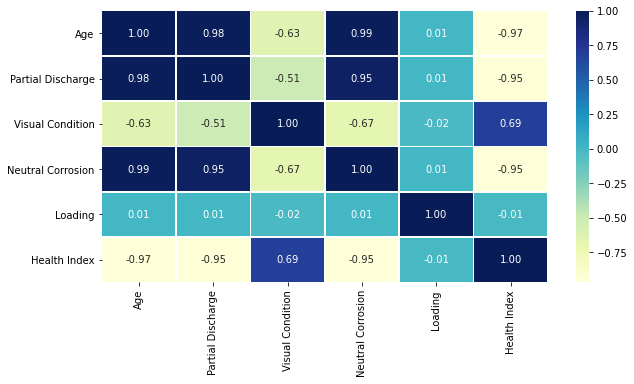

In [27]:
# Correlation matrix
import seaborn as sns
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu");

# Applying ML models

## RandomForestClassifiers

In [28]:
np.random.seed(0)
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
model.score(X_test,y_test)

0.958

In [30]:
y_preds=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        74
           2       0.84      0.93      0.88        85
           3       0.95      0.88      0.91       122
           4       1.00      1.00      1.00       115
           5       1.00      1.00      1.00       104

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



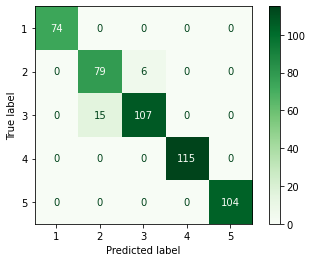

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

In [32]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
model1=RandomForestClassifier(max_depth=80,min_samples_leaf=8,min_samples_split=4,n_estimators=10,random_state=0,criterion='gini',max_features='auto')
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.96

In [34]:
y_preds=model1.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        74
           2       0.88      0.88      0.88        85
           3       0.92      0.92      0.92       122
           4       1.00      1.00      1.00       115
           5       1.00      1.00      1.00       104

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



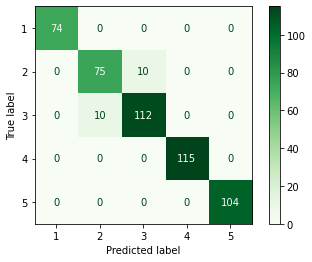

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

## Gaussian Naive Bayes

In [36]:
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.946

In [37]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

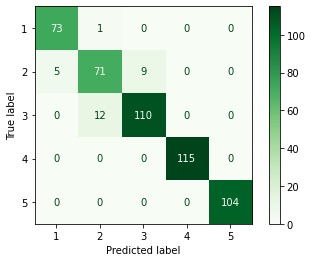

In [38]:
y_preds=gnb.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

In [39]:
y_preds=gnb.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96        74
           2       0.85      0.84      0.84        85
           3       0.92      0.90      0.91       122
           4       1.00      1.00      1.00       115
           5       1.00      1.00      1.00       104

    accuracy                           0.95       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.95      0.95      0.95       500



## KNeighborClassifiers

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
knn.score(X_test,y_test)

0.814

In [43]:
y_preds=knn.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.82      0.95      0.88        75
           2       0.79      0.66      0.72        96
           3       0.79      0.83      0.81       125
           4       0.84      0.71      0.77       101
           5       0.84      0.94      0.89       103

    accuracy                           0.81       500
   macro avg       0.81      0.82      0.81       500
weighted avg       0.81      0.81      0.81       500



In [44]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(transformed_X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

KeyboardInterrupt: 

In [45]:
knn1=KNeighborsClassifier(leaf_size=9,p=1,n_neighbors=1)
knn1.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=9, n_neighbors=1, p=1)

In [46]:
knn1.score(X_test,y_test)

0.88

In [47]:
y_preds=knn1.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.88      0.93      0.90        75
           2       0.81      0.74      0.77        96
           3       0.85      0.85      0.85       125
           4       0.92      0.90      0.91       101
           5       0.94      0.99      0.96       103

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



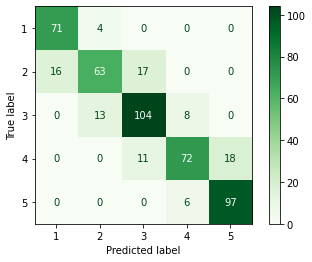

In [48]:
y_preds=knn.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

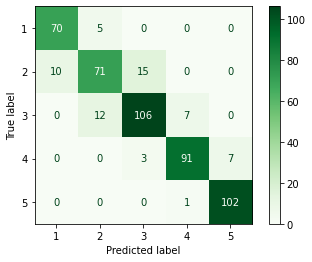

In [49]:
y_preds=knn1.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

## SVM

In [50]:
from sklearn import svm
svm2= svm.SVC(kernel='rbf',gamma=0.0001,C=1000)
svm2.fit(X_train,y_train)
svm2.score(X_test,y_test)

0.936

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [51]:
y_preds=svm2.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.93      0.99      0.95        75
           2       0.86      0.79      0.83        96
           3       0.89      0.91      0.90       125
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00       103

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



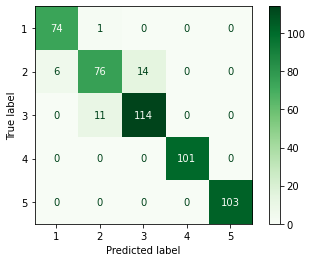

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

In [54]:
from sklearn import svm
svm2= svm.SVC()
svm2.fit(X_train,y_train)
svm2.score(X_test,y_test)

0.25

## Decision Tree Classifier

In [55]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
dtc.score(X_test,y_test)

0.954

In [57]:
y_preds=dtc.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        75
           2       0.88      0.88      0.88        96
           3       0.90      0.91      0.91       125
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00       103

    accuracy                           0.95       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.95      0.95      0.95       500



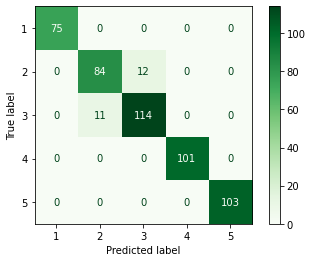

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

## Logistic Regression

In [60]:
np.random.seed(41)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.948

In [61]:
y_preds=lr.predict(X_test)

In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.95      0.96      0.95        75
           2       0.88      0.84      0.86        96
           3       0.91      0.94      0.92       125
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00       103

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



## Comparison of Different ML Models

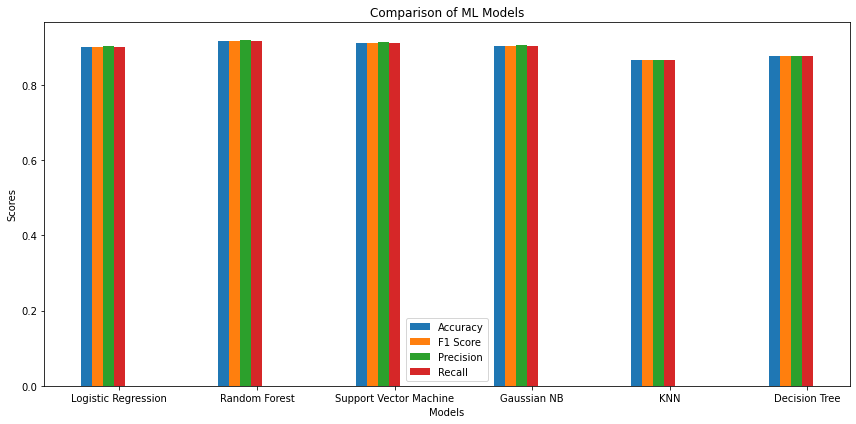

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Generate a hypothetical multiclass dataset with compatible parameters
X, y = make_classification(
    n_samples=2500,
    n_features=20,
    n_classes=2,  # Reduced to 2 classes
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(max_depth=80, min_samples_leaf=8, min_samples_split=4, n_estimators=10, random_state=0, criterion='gini', max_features='auto'),
    "Support Vector Machine": SVC(kernel='rbf', gamma=0.0001, C=1000),
    "Gaussian NB": GaussianNB(),
    "KNN": KNeighborsClassifier(leaf_size=9, p=1, n_neighbors=1),
    "Decision Tree": DecisionTreeClassifier()
}

# Initialize dictionaries to store metrics
accuracy_scores = {}
f1_scores = {}
precision_scores = {}
recall_scores = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    f1_scores[model_name] = f1_score(y_test, y_pred, average='weighted')
    precision_scores[model_name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[model_name] = recall_score(y_test, y_pred, average='weighted')

# Create a bar chart to compare models
models_list = list(models.keys())

x = np.arange(len(models_list))
width = 0.08

fig, ax = plt.subplots(figsize=(12, 6))

accuracy_list = [accuracy_scores[model_name] for model_name in models_list]
f1_list = [f1_scores[model_name] for model_name in models_list]
precision_list = [precision_scores[model_name] for model_name in models_list]
recall_list = [recall_scores[model_name] for model_name in models_list]

ax.bar(x - 3*width, accuracy_list, width, label='Accuracy')
ax.bar(x - 2*width, f1_list, width, label='F1 Score')
ax.bar(x - width, precision_list, width, label='Precision')
ax.bar(x, recall_list, width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ML Models')
ax.set_xticks(x)
ax.set_xticklabels(models_list)
ax.legend()

plt.tight_layout()
plt.show()


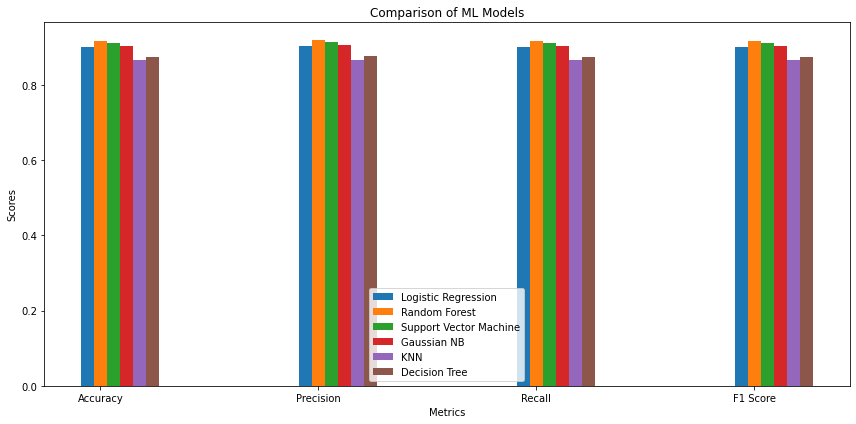

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Generate a hypothetical multiclass dataset with compatible parameters
X, y = make_classification(
    n_samples=2500,
    n_features=20,
    n_classes=2,  # Reduced to 2 classes
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(max_depth=80, min_samples_leaf=8, min_samples_split=4, n_estimators=10, random_state=0, criterion='gini', max_features='auto'),
    "Support Vector Machine": SVC(kernel='rbf', gamma=0.0001, C=1000),
    "Gaussian NB": GaussianNB(),
    "KNN": KNeighborsClassifier(leaf_size=9, p=1, n_neighbors=1),
    "Decision Tree": DecisionTreeClassifier()
}

# Initialize dictionaries to store metrics
accuracy_scores = {}
f1_scores = {}
precision_scores = {}
recall_scores = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[model_name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[model_name] = f1_score(y_test, y_pred, average='weighted')

# Create a bar chart to compare models
models_list = list(models.keys())

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_list))
width = 0.06

fig, ax = plt.subplots(figsize=(12, 6))

for i, model_name in enumerate(models_list):
    model_scores = [accuracy_scores[model_name], precision_scores[model_name], recall_scores[model_name], f1_scores[model_name]]
    ax.bar(x + i*width, model_scores, width, label=model_name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ML Models')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics_list)
ax.legend()

plt.tight_layout()
plt.show()
